In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

# data
import pandas as pd
import numpy as np

# viz
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
SQL_USERNAME = "postgres"
SQL_PASSWORD = "postgres" # change this
SQL_IP = "localhost"
PORT = 5432
DATABASE = "crowdfunding_db" # change this

In [3]:
connection_string = f"postgresql+psycopg2://{SQL_USERNAME}:{SQL_PASSWORD}@{SQL_IP}:{PORT}/{DATABASE}"
engine = create_engine(connection_string)

In [4]:
# INSPECT

# Create the inspector and connect it to the engine
inspector_gadget = inspect(engine)

# Collect the names of tables within the database
tables = inspector_gadget.get_table_names()

# print metadata for each table
for table in tables:
    print(table)
    print("-----------")
    
    # get columns
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

contacts_option1
-----------
contact_id INTEGER
first_name VARCHAR(50)
last_name VARCHAR(50)
email VARCHAR(50)

category
-----------
category_id CHAR(4)
category VARCHAR(30)

subcategory
-----------
subcategory_id CHAR(8)
subcategory VARCHAR(30)

campaign
-----------
cf_id INTEGER
contact_id INTEGER
company_name VARCHAR(50)
description VARCHAR(100)
goal DOUBLE PRECISION
pledged DOUBLE PRECISION
outcome VARCHAR(10)
backers_count INTEGER
country VARCHAR(2)
currency VARCHAR(3)
launch_date TIMESTAMP
end_date TIMESTAMP
category_id CHAR(4)
subcategory_id VARCHAR(8)



In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

# Print all of the classes mapped to the Base
print(list(Base.classes))

[<class 'sqlalchemy.ext.automap.campaign'>, <class 'sqlalchemy.ext.automap.category'>, <class 'sqlalchemy.ext.automap.contacts_option1'>, <class 'sqlalchemy.ext.automap.subcategory'>]


In [6]:
query = """
    SELECT
        *
    FROM
        campaign;
"""

campaign_df = pd.read_sql(text(query), con=engine)
campaign_df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,category_id,subcategory_id
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13 06:00:00,2021-03-01 06:00:00,cat1,subcat1
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,2021-01-25 06:00:00,2021-05-25 05:00:00,cat2,subcat2
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,2020-12-17 06:00:00,2021-12-30 06:00:00,cat3,subcat3
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,2021-10-21 05:00:00,2022-01-17 06:00:00,cat2,subcat2
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,2020-12-21 06:00:00,2021-08-23 05:00:00,cat4,subcat4


In [43]:
# Query 3 - How do the goals and number of backers compare between successful and failed campaigns?

# Select all rows in goal and backers_count that were failed in outcome and create a df
query = """
SELECT goal, backers_count
FROM campaign
WHERE outcome = 'failed';
"""
failed_df = pd.read_sql(text(query), con=engine)
failed_df

,goal,backers_count
0,100.0,0
1,4200.0,24
2,7600.0,53
3,5200.0,18
4,6200.0,44
...,...,...
359,9400.0,64
360,7800.0,64
361,141100.0,842
362,6600.0,112


In [44]:
# Select all rows in goal and backers_count that were successful in outcome and create a df
query = """
SELECT goal, backers_count
FROM campaign
WHERE outcome = 'successful';
"""
successful_df = pd.read_sql(text(query), con=engine)
successful_df

,goal,backers_count
0,1400.0,158
1,108400.0,1425
2,7600.0,174
3,4500.0,227
4,5200.0,220
...,...,...
560,6200.0,480
561,2400.0,226
562,9800.0,241
563,3100.0,132


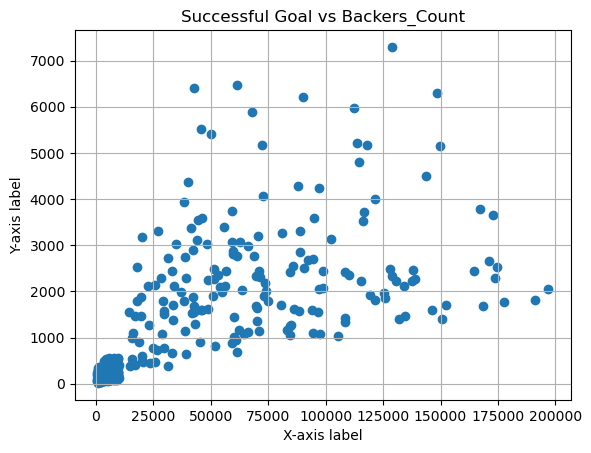

In [66]:
# Scatterplot of successful campaigns comparing goal and backers_count
x = successful_df['goal']
y = successful_df['backers_count']

# Create the scatter plot
plt.scatter(x, y)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Successful Goal vs Backers_Count')
plt.grid(True)
plt.show()

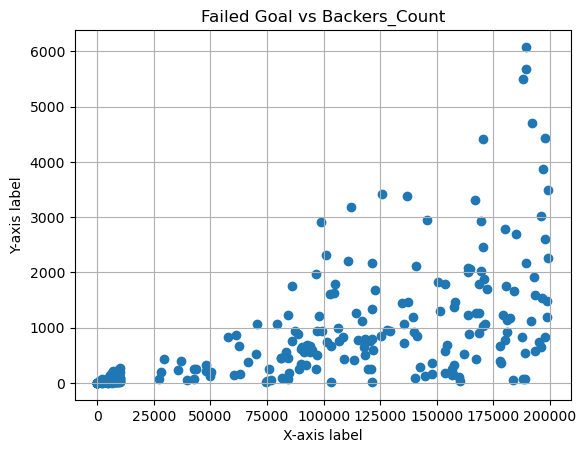

In [46]:
# Scatterplot of failed campaigns comparing goal and backers_count
failed_x = failed_df['goal']
failed_y = failed_df['backers_count']

# Create the scatter plot
plt.scatter(failed_x, failed_y)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Failed Goal vs Backers_Count')
plt.grid(True)
plt.show()

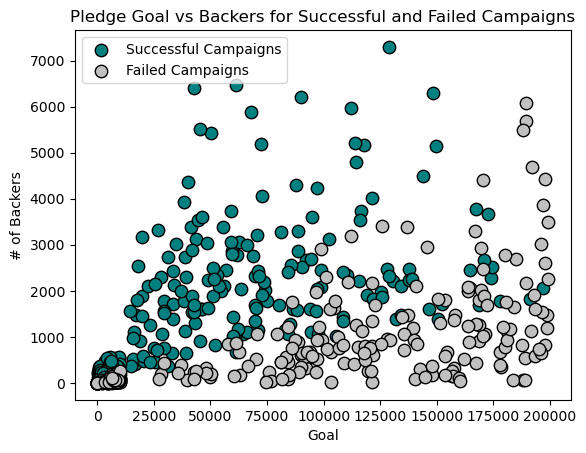

In [65]:
# Combine the two scatterplots
# Create first scatter plot within the 'ax' element
ax = successful_df.plot.scatter(x='goal', y='backers_count', color='teal', edgecolor='black', s=80, label='Successful Campaigns')

# Create second scatter plot, using 'ax' element
failed_df.plot.scatter(x='goal', y='backers_count', color='silver', edgecolor='black', s=80, label='Failed Campaigns', ax=ax)

# Title and labels
plt.xlabel('Goal')
plt.ylabel('# of Backers')
plt.title('Pledge Goal vs Backers for Successful and Failed Campaigns')

# Show
plt.show()